In [1]:
# TO-DO
## To be implemented yet
# Day 1: Spend building the front-end for iOS, android & web
# Day 2: Spend building the deep learning CNN models, viz., YOLO to object detect license plates
# Day 3: Spend semantically(character) segment numberplates and integrate with front-end

In [19]:
!python './server.py'

 * Serving Flask app 'server'
 * Debug mode: on
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 949-036-341
^C


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
import keras
import easyocr
# from keras import optimizers
# from keras import Sequential
# from keras.preprocessing.image import ImageDataGenerator
# from keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D

2024-01-21 05:39:56.000589: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
# Making sure of the tensorflow compatibility with the keras API/framework
print("Tensorflow version: " + tf.__version__ + " Keras version: " + keras.__version__)

Tensorflow version: 2.15.0 Keras version: 2.15.0


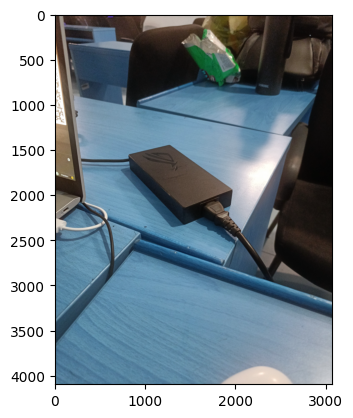

In [14]:
with open("./server/uploads/image_base64.txt", "r") as f:
    im_b64 = f.read()

im_bytes = base64.b64decode(im_b64)
im_arr = np.frombuffer(im_bytes, dtype=np.uint8)  # im_arr is one-dim Numpy array
img = cv2.imdecode(im_arr, flags=cv2.IMREAD_COLOR)
plt.imshow(img)

In [9]:
plate_cascade = cv2.CascadeClassifier('./filters/indian_license_plate.xml')
def detect_plate(img, text=''):
    plate = None  # Initialize plate with None
    plate_img = img.copy()
    roi = img.copy()
    plate_rect = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.2, minNeighbors=7)
    for (x, y, w, h) in plate_rect:
        roi_ = roi[y:y+h, x:x+w, :]
        plate = roi[y:y+h, x:x+w, :]
        cv2.rectangle(plate_img, (x+2, y), (x+w-3, y+h-5), (51, 181, 155), 3)
    if text != '' and plate is not None:
        plate_img = cv2.putText(plate_img, text, (x-w//2, y-h//2), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.5, (51, 181, 155), 1, cv2.LINE_AA)

    return plate_img, plate

def display(img_, title=''):
    img = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(10,6))
    ax = plt.subplot(111)
    ax.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()

In [13]:
from ultralytics import YOLO
cmodel = YOLO('yolov8n.pt')
# lpd = YOLO('./models/license_plate_detector.pt')
detections = cmodel(img)[0]
for detection in detections.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = detection

FileNotFoundError: [Errno 2] No such file or directory: 'models/license_plate_detector.pt'

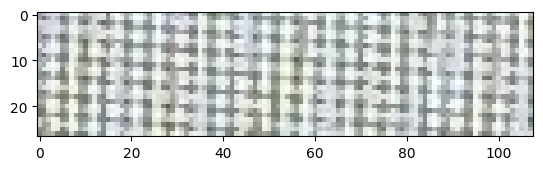

In [10]:
cropped_image = detect_plate(img)[1]
plt.imshow(cropped_image)

In [11]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
print(result[0][1])

IndexError: list index out of range